# Librerias y BD


In [1]:
!pip install --upgrade spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.2 MB 3.8 MB/s 
     |████████████████████████████████| 42 kB 821 kB/s 
     |████████████████████████████████| 181 kB 51.5 MB/s 
     |████████████████████████████████| 660 kB 47.1 MB/s 
     |████████████████████████████████| 10.1 MB 37.1 MB/s 
     |████████████████████████████████| 457 kB 43.8 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srs

In [2]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [3]:
!python -m spacy download es_core_news_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.3 MB 35 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [4]:
import spacy as spc
nlp = spc.load('es_core_news_md')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

import re
from unicodedata import normalize
import time
from os import listdir
from collections import defaultdict #para que cuando una nueva palabra sea encontrada la reemplaze

def ls(ruta = '.'):
    return listdir(ruta)
directory= '/content/drive/MyDrive/Proyectos/student_learning_nlp/'

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import paired_cosine_distances
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from yellowbrick.features import PCA

In [7]:
df = pd.read_csv(directory+'database/total.csv',index_col=0)
text_pre = df['text_pre']
text_pos = df['text_pos']
text_total = np.concatenate((text_pre,text_pos),axis=0)  

y = np.ones(len(text_total))
y[:len(text_pre)] = 0
resultados = np.zeros( (3,len(text_pre)) ) #array para ir almacenando los resultados 

# Stemming

In [8]:
import nltk
from nltk import word_tokenize 
from nltk.stem import SnowballStemmer

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
#[stemmer.stem(i) for i in word_tokenize(text)]

In [11]:
def stemming(texto,stemmer):
  texto = texto.strip() #quitar espacios dobles y saltos de linea
  doc = word_tokenize(texto)
  tokens = [stemmer.stem(token) for token in doc]
  return ' '.join(tokens)

In [12]:
stemmer = SnowballStemmer('spanish')

lem_pre = [stemming(text,stemmer) for text in text_pre]
lem_pos = [stemming(text,stemmer) for text in text_pos]
lem_total = [stemming(text,stemmer) for text in text_total]

## TF-IDF

In [13]:
vectorizer = TfidfVectorizer(ngram_range=(1,2),min_df=0.06)#aparece en mas de un doc
vectorizer.fit(lem_total)

tfidf_pre = vectorizer.transform(lem_pre)
tfidf_pos = vectorizer.transform(lem_pos)

cosine_dis=paired_cosine_distances(tfidf_pre,tfidf_pos)
print(cosine_dis)
resultados[0]=cosine_dis

[0.62803499 0.8163273  0.76585137 0.73618828 0.73338697 0.74343867
 0.71590629 0.67872783 0.7340182  0.74315939 0.82113643 0.81058901
 0.88825948 0.72710724 0.77900217 0.79864387 0.17638547 0.61099189]


In [14]:
print('mean: ',cosine_dis.mean())
print('std: ',cosine_dis.std())
print('med: ',np.median(cosine_dis))
print('min: ',cosine_dis.min())
print('max: ',cosine_dis.max())

mean:  0.7170641591287721
std:  0.14662683680606362
med:  0.7396738362845879
min:  0.17638547191694226
max:  0.8882594837951507


In [15]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=1000)
# vectorizer.fit(text_total)

# tfidf_pre = vectorizer.transform(lem_pre)
# tfidf_pos = vectorizer.transform(lem_pos)

# print(paired_cosine_distances(tfidf_pre,tfidf_pos))

In [16]:
df.iloc[-2]['text_pre']

'bioinformatica union biologia ciencias computacionales compone union disciplinas solucionar problemas innovar informatica analisis datos ordenamiento almacenamiento mimos dinamica bioinformatica modelos datos comparaciones permite visualizar datos graficas ciencia multifuncional presente areas biologia quimica ciencias sociales ejemplo area permitido avanzar estudios genoma humano permitiendo profesionales acceder informacion estudios necesidad practicas experimentales recopilacion datos ido almacenando tiempo ejemplo analisis poblacion edad genero profesiones trabajar bioinformatica requiere cantidad informacion distintas herramientas organizar base datos rama desmeritado profesionales distintos campos biologia creia computacion biologia tipo datos garantizando veracidad transformacion digital permitido acortar tiempo investigaciones reunir cantidad datos perfeccionando mimos bioinformatica visto vuelta bastantes proyectos actualmente podido aclamar avances llegando revistas cientifi

In [17]:
df.iloc[-2]['text_pos']

'bioinformatica union biologia ciencias computacionales compone union disciplinas solucionar problemas innovar informatica analisis datos ordenamiento almacenamiento mimos dinamica bioinformatica modelos datos comparaciones permite visualizar datos graficas ciencia multifuncional bioinformatica trabajar areas biologia quimica ciencias sociales ejemplo area permitido avanzar estudios genoma humano permitiendo profesionales acceder informacion estudios necesidad practicas experimentales recopilacion datos ido almacenando tiempo comparando dichos analisis aspectos sociales poblacion edad genero profesiones considero bioinformatica representa avance distintos estudios fines investigativos llegar facil soluciones conclusiones viable accesible personas bioinformatica campo dando importancia deberia campo considerar olvidado reconocido simplemente evidenciado partes estudios cientificos poblacionales influencia rama ejemplo machine learning modelo bioinformatico usado logrado optimizacion dat

In [18]:
len(vectorizer.vocabulary_)

643

In [19]:
len(vectorizer.stop_words_) # palabras que se remueven con la condicion df>0.06

5801

In [20]:
from yellowbrick.text import TSNEVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


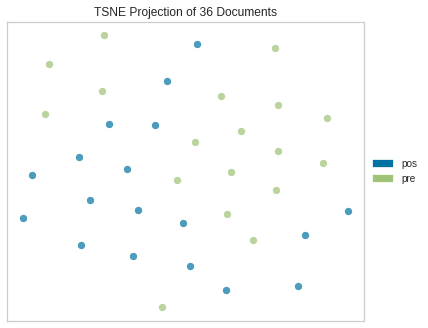

In [21]:
tsne = TSNEVisualizer(random_state=42)
d={0:'pre',1:'pos'}
tsne.fit(vectorizer.transform(lem_total), [d[i] for i in y])
tsne.show()

## Word2Vec

Entrenando el embedding

In [22]:
import gensim
from gensim.models.callbacks import CallbackAny2Vec

EPOCHS = 20
vec_loss=list()
class LossLogger(CallbackAny2Vec):
    '''Output loss at each epoch'''
    def __init__(self):
        self.epoch = 1
        self.losses = []
        self.pre_loss = 0
    def on_epoch_begin(self, model):
        #print(f'Epoch: {self.epoch}','pre: ',model.get_latest_training_loss(), end='\t')
        pass
    def on_epoch_end(self, model):
        pos_loss = model.get_latest_training_loss()
        loss = pos_loss-self.pre_loss
        vec_loss.append(loss)
        self.losses.append(loss)
        #print(f'  Loss: {loss}')
        self.epoch += 1
        self.pre_loss = pos_loss 

loss_logger = LossLogger()
mod = gensim.models.word2vec.Word2Vec(sentences=np.array([re.findall(r'(?u)\b\w\w+\b', text) for text in lem_total]),
                                      vector_size=10,
                                      sg=0,
                                      window=3,
                                      min_count=2,
                                      callbacks=[loss_logger],
                                      compute_loss=True,
                                      epochs=500,
                                      alpha=0.1,
                                      min_alpha=0.1,
                                      workers=4,
                                      )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


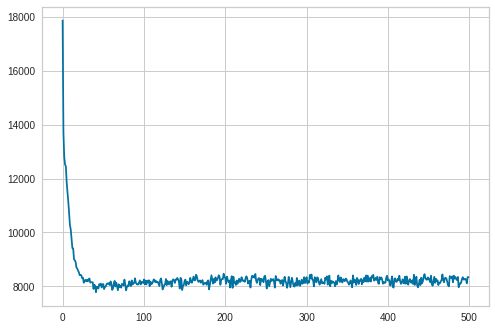

In [23]:
plt.plot(vec_loss)

In [24]:
model = Word2Vec(sentences=np.array([re.findall(r'(?u)\b\w\w+\b', text) for text in lem_total]), 
                 vector_size=10, 
                 sg=0,
                 window=3, 
                 min_count=2, 
                 workers=4,
                 epochs=100,
                alpha=0.1,
                 min_alpha=0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [25]:
def Word2Vec_doc(texto,model):
  vec = list() 
  for token in texto:
    if token not in model.wv.index_to_key:
      #print(token.text,token.is_oov)#hay algunos conceptos de bioinformatica que no aparecen
      continue
    else:
      vec.append(model.wv[token])
  return np.mean(np.array(vec),axis=0)

In [26]:
w2v_pre = np.array([Word2Vec_doc(re.findall(r'(?u)\b\w\w+\b', text),model) for text in lem_pre])
w2v_pos = np.array([Word2Vec_doc(re.findall(r'(?u)\b\w\w+\b', text),model) for text in lem_pos])

cosine_dis=paired_cosine_distances(w2v_pre,w2v_pos)
print(cosine_dis)
resultados[1]=cosine_dis

[0.2760986  0.7230694  0.63607377 0.50345474 0.40220183 0.444455
 0.34114844 0.43172622 0.60888636 0.6437439  0.3989958  0.5427637
 0.8199788  0.6614169  0.49764064 0.55363256 0.01200031 0.30988252]


In [27]:
model.wv.similar_by_vector(w2v_pre.mean(axis=0),40)

[('import', 0.5214102268218994),
 ('resalt', 0.5078375339508057),
 ('discrep', 0.4890749752521515),
 ('sintet', 0.4872190058231354),
 ('ann', 0.4774335026741028),
 ('particul', 0.4750008285045624),
 ('derech', 0.47432175278663635),
 ('fundament', 0.47013938426971436),
 ('polimer', 0.4680587947368622),
 ('mar', 0.4680037498474121),
 ('deduc', 0.4646366834640503),
 ('tant', 0.462331086397171),
 ('microbiologi', 0.46135076880455017),
 ('al', 0.4601598381996155),
 ('analisis', 0.456464946269989),
 ('pens', 0.4555358588695526),
 ('visibl', 0.4491110146045685),
 ('cicl', 0.44845208525657654),
 ('clar', 0.44490566849708557),
 ('mostr', 0.4324922263622284),
 ('introduccion', 0.43214792013168335),
 ('are', 0.4320877194404602),
 ('cultur', 0.4305717349052429),
 ('markov', 0.4299938678741455),
 ('sen', 0.42816251516342163),
 ('academ', 0.4278312623500824),
 ('paralog', 0.42762506008148193),
 ('conclusion', 0.42685794830322266),
 ('correct', 0.42602843046188354),
 ('suced', 0.4230972230434418),
 (

In [28]:
model.wv.similar_by_vector(w2v_pos.mean(axis=0),40)

[('analisis', 0.7409729957580566),
 ('dirig', 0.6733177900314331),
 ('dr', 0.6729469299316406),
 ('desarroll', 0.6300109624862671),
 ('analiz', 0.6298868060112),
 ('craig', 0.6229552030563354),
 ('tecnologi', 0.6085062623023987),
 ('desconoc', 0.58913654088974),
 ('multipl', 0.5737050175666809),
 ('entabl', 0.5706148147583008),
 ('experimental', 0.5475148558616638),
 ('secuenciacion', 0.541987419128418),
 ('herramient', 0.535796046257019),
 ('metod', 0.5333247780799866),
 ('industri', 0.5227133631706238),
 ('construccion', 0.5193762183189392),
 ('adquir', 0.5192806124687195),
 ('comparacion', 0.5158756375312805),
 ('labor', 0.5147655606269836),
 ('cantidad', 0.5076197981834412),
 ('potencial', 0.5055328011512756),
 ('expert', 0.5053431987762451),
 ('biomedicin', 0.4996315538883209),
 ('descubr', 0.49621957540512085),
 ('tecnic', 0.49386730790138245),
 ('mund', 0.4934046268463135),
 ('brind', 0.48946812748908997),
 ('trat', 0.4868529736995697),
 ('algoritm', 0.48502546548843384),
 ('gen

In [29]:
print('mean: ',cosine_dis.mean())
print('std: ',cosine_dis.std())
print('med: ',np.median(cosine_dis))
print('min: ',cosine_dis.min())
print('max: ',cosine_dis.max())

mean:  0.48928717
std:  0.1839475
med:  0.5005477
min:  0.012000306
max:  0.8199788


In [30]:
# tsne = TSNEVisualizer(random_state=10)
# d={0:'pre',1:'pos'}
# tsne.fit(np.array([Word2Vec_doc(re.findall(r'(?u)\b\w\w+\b', text),model) for text in lem_total]), [d[i] for i in y])
# tsne.show()

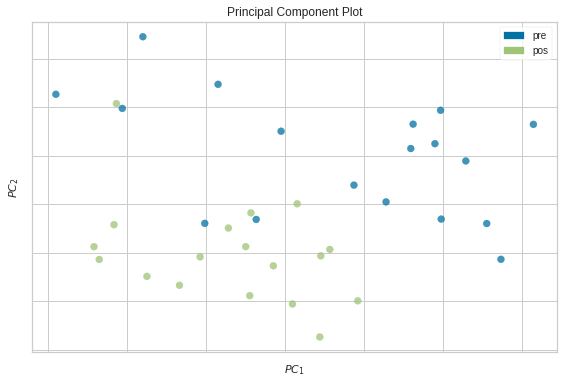

In [31]:
classes = ['pre', 'pos']
visualizer = PCA(
    scale=True, projection=2,classes=classes
)
d={0:'pre',1:'pos'}
visualizer.fit_transform(np.array([Word2Vec_doc(re.findall(r'(?u)\b\w\w+\b', text),model) for text in lem_total]),list(map(int,y)))
visualizer.show()

## Doc2vec

In [32]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [33]:
tokens_total = [re.findall(r'(?u)\b\w\w+\b', text) for text in lem_total]
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokens_total)]

In [34]:
model = Doc2Vec(documents,                  
                vector_size=20, 
                 window=3, 
                 min_count=2, 
                 workers=4,
                 epochs=500,
                alpha=0.1,
                 min_alpha=0.1,dm=1)# la perdida no esta implementada

In [35]:
d2v_pre = np.array( [model.dv[i] for i in range(len(lem_pre))] )
d2v_pos = np.array( [model.dv[i] for i in range(len(lem_pre),len(lem_total))] )

cosine_dis=paired_cosine_distances(d2v_pre,d2v_pos)
print(cosine_dis)
resultados[2]=cosine_dis

[0.5394328  0.90302455 0.7730035  0.5353581  0.6331654  0.79422545
 0.7624904  0.3522089  0.62678707 0.7749152  0.70890135 0.8487584
 0.7721569  0.5660922  0.6789798  0.53815675 0.05591265 0.50277555]


In [36]:
print('mean: ',cosine_dis.mean())
print('std: ',cosine_dis.std())
print('med: ',np.median(cosine_dis))
print('min: ',cosine_dis.min())
print('max: ',cosine_dis.max())

mean:  0.63146365
std:  0.19576001
med:  0.6560726
min:  0.055912655
max:  0.90302455


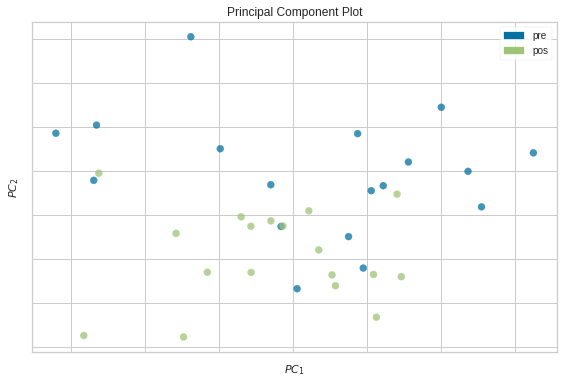

In [37]:
d2v_total = np.array( [model.infer_vector(re.findall(r'(?u)\b\w\w+\b', text)) for text in lem_total] )
classes = ['pre', 'pos']
visualizer = PCA(
    scale=True, projection=2,classes=classes
)
d={0:'pre',1:'pos'}
visualizer.fit_transform(d2v_total,list(map(int,y)))
visualizer.show()

# Resultados

In [38]:
df_resul = pd.DataFrame(resultados.T,columns=['TF-IDF','Word2Vec','Doc2Vec'])
df_resul.head()

,TF-IDF,Word2Vec,Doc2Vec
0,0.628035,0.276099,0.539433
1,0.816327,0.723069,0.903025
2,0.765851,0.636074,0.773004
3,0.736188,0.503455,0.535358
4,0.733387,0.402202,0.633165


In [39]:
plt.style.use('seaborn')
#plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["xtick.labelsize"] = 12 
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["font.size"] = 12 
plt.rcParams["legend.fontsize"] = 12 
plt.rcParams["axes.labelsize"] = 13 
plt.rcParams["axes.titlesize"] = 12 
plt.rcParams["figure.titlesize"] = 12 

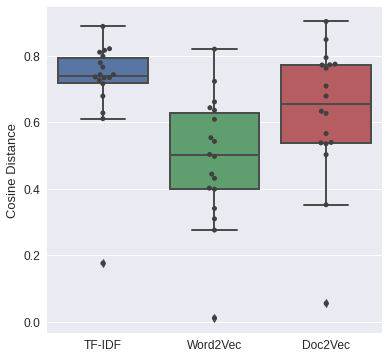

In [40]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(data=df_resul,linewidth=2) 
ax = sns.swarmplot(data=df_resul, color=".25",size=5)
ax.set_ylabel('Cosine Distance')
plt.savefig('/content/drive/MyDrive/Proyectos/student_learning_nlp/images/stemm_results.svg',format='svg')
plt.show()